In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import re
import matplotlib.pyplot as plt
import operator

In [4]:
import numpy as np

In [5]:
pd.set_option('display.max_columns', 100)

In [75]:
df =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\mlrc22_title.csv", index_col=0)

In [76]:
df.shape

(44665, 30)

In [77]:
df.head(1)

,title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,rating,lead_actor,lead_actress,director1
0,Toy Story,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,3.888157,Tom Hanks,Annie Potts,John Lasseter


In [19]:
pd.isnull(df).sum()

Unnamed: 0               0
Action                   0
Adventure                0
Animation                0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Family                   0
Fantasy                  0
Foreign                  0
History                  0
Horror                   0
Music                    0
Mystery                  0
Romance                  0
Science Fiction          0
TV Movie                 0
Thriller                 0
War                      0
Western                  0
original_language       11
prod1                11708
country               6132
budget                   0
runtime                252
rating                   0
lead_actor            6419
lead_actress         11124
director1             5502
dtype: int64

In [78]:
df.dropna(subset=['director1'], axis='rows', inplace=True)
df.dropna(subset=['lead_actress'], axis='rows', inplace=True)
df.dropna(subset=['lead_actor'], axis='rows', inplace=True)
df.dropna(subset=['runtime'], axis='rows', inplace=True)
df.dropna(subset=['original_language'], axis='rows', inplace=True)
df.dropna(subset=['prod1'], axis='rows', inplace=True)
df.dropna(subset=['country'], axis='rows', inplace=True)
pd.isnull(df).sum()

title                0
Action               0
Adventure            0
Animation            0
Comedy               0
Crime                0
Documentary          0
Drama                0
Family               0
Fantasy              0
Foreign              0
History              0
Horror               0
Music                0
Mystery              0
Romance              0
Science Fiction      0
TV Movie             0
Thriller             0
War                  0
Western              0
original_language    0
prod1                0
country              0
budget               0
runtime              0
rating               0
lead_actor           0
lead_actress         0
director1            0
dtype: int64

In [79]:
df.shape

(25590, 30)

# Only keep actors who have 5+ movie records

In [80]:
actor_c = df['lead_actor'].value_counts().reset_index()
actor_c.head(2)

,index,lead_actor
0,John Wayne,90
1,Nicolas Cage,61


In [81]:
actor_c.columns= ["lead_actor", "actor_count"]
actor_c.head(2)

,lead_actor,actor_count
0,John Wayne,90
1,Nicolas Cage,61


In [82]:
actor_c.describe()

,actor_count
count,8126.000000
mean,3.149151
std,5.165271
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,90.000000


In [136]:
# Limiting actors to 5+ movies decrease count from 8126 to 1270
actor_c5 = actor_c[(actor_c['actor_count'] >=10)]
actor_c5.shape

(530, 2)

In [84]:
# Only keep actresses with 5+ movies

In [85]:
actress_c = df['lead_actress'].value_counts().reset_index()
actress_c.head(2)

,index,lead_actress
0,Bette Davis,60
1,Barbara Stanwyck,55


In [86]:
actress_c.columns= ["lead_actress", "actor_count"]
actress_c.head(2)

,lead_actress,actor_count
0,Bette Davis,60
1,Barbara Stanwyck,55


In [87]:
actress_c.describe()

,actor_count
count,8665.00000
mean,2.95326
std,4.18388
min,1.00000
25%,1.00000
50%,1.00000
75%,3.00000
max,60.00000


In [137]:
# Limiting actress to 5+ movies decrease count from 8665 to 1370
actress_c5 = actress_c[(actress_c['actor_count'] >=10)]
actress_c5.shape

(486, 2)

In [89]:
# Only keep directors with 5+ movies

In [90]:
director_c = df['director1'].value_counts().reset_index()
director_c.head(2)

,index,director1
0,Michael Curtiz,60
1,John Ford,56


In [91]:
director_c.columns= ["director", "dir_count"]
director_c.head(2)

,director,dir_count
0,Michael Curtiz,60
1,John Ford,56


In [92]:
director_c.describe()

,dir_count
count,9733.000000
mean,2.629200
std,3.701467
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,60.000000


In [138]:
# Limiting actress to 5+ movies decrease count from 9733 to 1304
dir_c5 = director_c[(director_c['dir_count'] >=10)]
dir_c5.shape

(450, 2)

# Create datsets

In [94]:
df.shape

(25590, 30)

In [139]:
# Limit dataset to 5+ actors
df_actor = df.merge(actor_c5[['lead_actor']], how='inner', on='lead_actor')
df_actor.shape

(10133, 30)

In [140]:
# Limit dataset to 5+ actress
df_actress= df.merge(actress_c5[['lead_actress']], how='inner', on='lead_actress')
df_actress.shape

(8201, 30)

In [141]:
# Limit dataset to 5+ directors
df_dir = df.merge(dir_c5[['director']], how='inner', left_on='director1', right_on='director')
df_dir.shape

(7214, 31)

In [98]:
df_actor.head(1)

,title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,rating,lead_actor,lead_actress,director1
0,Toy Story,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,3.888157,Tom Hanks,Annie Potts,John Lasseter


In [99]:
df_actress.head(1)

,title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,rating,lead_actor,lead_actress,director1
0,Jumanji,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,en,TriStar Pictures,US,65000000,104.0,3.236953,Robin Williams,Kirsten Dunst,Joe Johnston


In [100]:
df_dir.head(1)

,title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,rating,lead_actor,lead_actress,director1,director
0,Toy Story,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,3.888157,Tom Hanks,Annie Potts,John Lasseter,John Lasseter


In [142]:
# concatenate all 3 datasets
frames = [df_actor, df_actress, df_dir]

In [143]:
df_all = pd.concat(frames)
df_all.head(3)

C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,budget,country,director,director1,lead_actor,lead_actress,original_language,prod1,rating,runtime,title
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30000000,US,NaN,John Lasseter,Tom Hanks,Annie Potts,en,Pixar Animation Studios,3.888157,81.0,Toy Story
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,52000000,US,NaN,Ron Howard,Tom Hanks,Kathleen Quinlan,en,Imagine Entertainment,3.884031,140.0,Apollo 13
2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,55000000,US,NaN,Robert Zemeckis,Tom Hanks,Robin Wright,en,Paramount Pictures,4.052926,142.0,Forrest Gump


In [144]:
df_all.shape

(25548, 31)

In [145]:
# Check for duplicates
cond = df_all['title'].duplicated(keep=False)
df_all.loc[cond].sort_values('title').head(10)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,budget,country,director,director1,lead_actor,lead_actress,original_language,prod1,rating,runtime,title
200,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,US,NaN,Nigel Cole,Christopher Walken,Sharon Stone,en,New Line Cinema,2.971698,98.0,$5 a Day
1754,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,US,NaN,Nigel Cole,Christopher Walken,Sharon Stone,en,New Line Cinema,2.971698,98.0,$5 a Day
8726,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,7500000,US,NaN,Marc Webb,Joseph Gordon-Levitt,Zooey Deschanel,en,Fox Searchlight Pictures,3.762534,95.0,(500) Days of Summer
6982,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,7500000,US,NaN,Marc Webb,Joseph Gordon-Levitt,Zooey Deschanel,en,Fox Searchlight Pictures,3.762534,95.0,(500) Days of Summer
2697,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,US,NaN,Robert Aldrich,Peter Falk,Vicki Frederick,en,Metro-Goldwyn-Mayer (MGM),2.381356,113.0,...All the Marbles
4988,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,US,Robert Aldrich,Robert Aldrich,Peter Falk,Vicki Frederick,en,Metro-Goldwyn-Mayer (MGM),2.381356,113.0,...All the Marbles
2745,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,FR,NaN,Roger Vadim,Jean-Louis Trintignant,Brigitte Bardot,fr,Iéna Productions,3.266010,95.0,...And God Created Woman
2945,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,FR,NaN,Roger Vadim,Jean-Louis Trintignant,Brigitte Bardot,fr,Iéna Productions,3.266010,95.0,...And God Created Woman
148,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,US,NaN,Norman Jewison,Al Pacino,Christine Lahti,en,Columbia Pictures Corporation,3.630727,119.0,...And Justice for All
1344,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,US,Norman Jewison,Norman Jewison,Al Pacino,Christine Lahti,en,Columbia Pictures Corporation,3.630727,119.0,...And Justice for All


In [146]:
# Remove duplicates
print('Number of duplicate titles before drop: {}'.format(df_all['title'].duplicated().sum()))
df_all.drop_duplicates('title', inplace=True)
print('Number of duplicate titles remaining: {}'.format(df_all['title'].duplicated().sum()))

Number of duplicate titles before drop: 10899
Number of duplicate titles remaining: 0


In [147]:
df_all.shape

(14649, 31)

In [148]:
pd.isnull(df_all).sum()

Action                   0
Adventure                0
Animation                0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Family                   0
Fantasy                  0
Foreign                  0
History                  0
Horror                   0
Music                    0
Mystery                  0
Romance                  0
Science Fiction          0
TV Movie                 0
Thriller                 0
War                      0
Western                  0
budget                   0
country                  0
director             12882
director1                0
lead_actor               0
lead_actress             0
original_language        0
prod1                    0
rating                   0
runtime                  0
title                    0
dtype: int64

In [149]:
df2 = df_all[['Action', 'Adventure', 'Animation',	'Comedy',	'Crime',	'Documentary',	'Drama',	'Family',	'Fantasy',	'Foreign',	'History',	'Horror',	'Music',	
                                  'Mystery',	'Romance',	'Science Fiction',	'TV Movie',	'Thriller',	'War',	'Western', 'original_language', 'prod1', 'country', 'budget', 'runtime', 'rating', 
                                  'lead_actor', 'lead_actress', 'director1']]
df2.head(1)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,rating,lead_actor,lead_actress,director1
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,3.888157,Tom Hanks,Annie Potts,John Lasseter


# One Hot Encoder

In [115]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [150]:
dfle = df2

In [151]:
df2['director1'] = df2['director1'].astype(str)
df2['lead_actor'] = df2['lead_actor'].astype(str)
df2['lead_actress'] = df2['lead_actress'].astype(str)
df2['original_language'] = df2['original_language'].astype(str)
df2['prod1'] = df2['prod1'].astype(str)
df2['country'] = df2['country'].astype(str)
dfle.director1 = le.fit_transform(dfle.director1)
dfle.lead_actor = le.fit_transform(dfle.lead_actor)
dfle.lead_actress = le.fit_transform(dfle.lead_actress)
dfle.original_language = le.fit_transform(dfle.original_language)
dfle.prod1 = le.fit_transform(dfle.prod1)
dfle.country = le.fit_transform(dfle.country)
dfle

C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,rating,lead_actor,lead_actress,director1
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9,2745,73,30000000,81.0,3.888157,3110,348,2219
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1771,73,52000000,140.0,3.884031,3110,2174,3856
2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,9,2660,73,55000000,142.0,4.052926,3110,3528,3808
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,3544,73,26000000,125.0,3.806407,3110,2898,2302
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,9,3544,73,21000000,105.0,3.516220,3110,2943,3270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1474,49,0,95.0,3.000000,1712,1666,1236
7197,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,11,1271,24,0,110.0,3.000000,1712,3442,1236
7198,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,269,24,0,85.0,3.000000,1421,1626,1236
7199,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,11,1827,24,0,100.0,2.833333,511,3871,1236


In [152]:
df2.shape

(14649, 29)

In [122]:
dfle.describe()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,rating,lead_actor,lead_actress,director1
count,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000,1.979000e+04,19790.000000,19790.000000,19790.000000,19790.000000,19790.000000
mean,0.186155,0.102779,0.034917,0.336938,0.136685,0.010409,0.521577,0.068671,0.059727,0.016978,0.036433,0.101920,0.036988,0.077564,0.198787,0.077110,0.017029,0.219202,0.032996,0.035018,13.119960,3145.535321,63.733805,8.591889e+06,101.829005,3.080535,2619.059121,2941.884386,3439.665488
std,0.389241,0.303678,0.183573,0.472675,0.343523,0.101496,0.499547,0.252900,0.236987,0.129193,0.187369,0.302551,0.188738,0.267492,0.399098,0.266772,0.129382,0.413716,0.178632,0.183829,5.891447,1628.132490,28.590916,2.451266e+07,28.460220,0.636620,1513.014504,1693.404442,1950.538161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1729.000000,32.000000,0.000000e+00,90.000000,2.750000,1300.000000,1508.000000,1780.250000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,3282.000000,87.000000,0.000000e+00,99.000000,3.156250,2559.500000,2866.500000,3370.500000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,4741.000000,87.000000,3.000000e+06,111.000000,3.500000,3975.000000,4389.000000,5201.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,5571.000000,92.000000,3.800000e+08,1256.000000,5.000000,5223.000000,5962.000000,6735.000000


In [153]:
df2.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,rating,lead_actor,lead_actress,director1
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9,2745,73,30000000,81.0,3.888157,3110,348,2219
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1771,73,52000000,140.0,3.884031,3110,2174,3856
2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,9,2660,73,55000000,142.0,4.052926,3110,3528,3808
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,3544,73,26000000,125.0,3.806407,3110,2898,2302
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,9,3544,73,21000000,105.0,3.516220,3110,2943,3270


In [154]:
# divide data into labels and attributes --df2
X = df2.drop('rating', axis=1)
y = df2['rating']

In [155]:
X.head(1)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,lead_actor,lead_actress,director1
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9,2745,73,30000000,81.0,3110,348,2219


In [156]:
names =list(X.columns)

# CART

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [158]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_leaf_nodes =20, max_depth =8)
rt = regressor.fit(X_train, y_train)
rt

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=20, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [159]:
y_pred = regressor.predict(X_test)

In [160]:
compare =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
compare

,Actual,Predicted
8158,2.785714,3.335501
7191,3.668675,3.123749
10023,2.666667,3.099555
6373,3.375000,3.248404
4132,2.909091,3.123749
...,...,...
3515,2.983906,2.764074
9027,3.250000,2.941025
4826,3.005190,3.123749
6436,3.552632,3.099555


In [161]:
# Evaluating the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.415191465943432
Mean Squared Error: 0.31239031332594325
Root Mean Squared Error: 0.5589188790208676


In [162]:
importance = rt.feature_importances_

In [163]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01780
Feature: 3, Score: 0.02476
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01833
Feature: 6, Score: 0.22639
Feature: 7, Score: 0.01824
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.08525
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.01846
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.01345
Feature: 20, Score: 0.03962
Feature: 21, Score: 0.01252
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.02858
Feature: 24, Score: 0.49660
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000


NameError: name 'pyplot' is not defined

In [419]:
conda install -c conda-forge pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\spark2\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.0                |   py37hf50a25e_1         3.1 MB  conda-forge
    graphviz-2.38.0            |    h6538335_1011        41.0 MB  conda-forge
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        44.0 MB

The following NEW packages will be INSTALLED:

  graphviz           conda-forge/win-64::graphviz-2.38.0-h6538335_1011
  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_2

The following packages will be UPDATED:

  conda                                4.8.5-py37hc8dfbb8_1 --> 4.9.0-py37hf50a25e_1




g

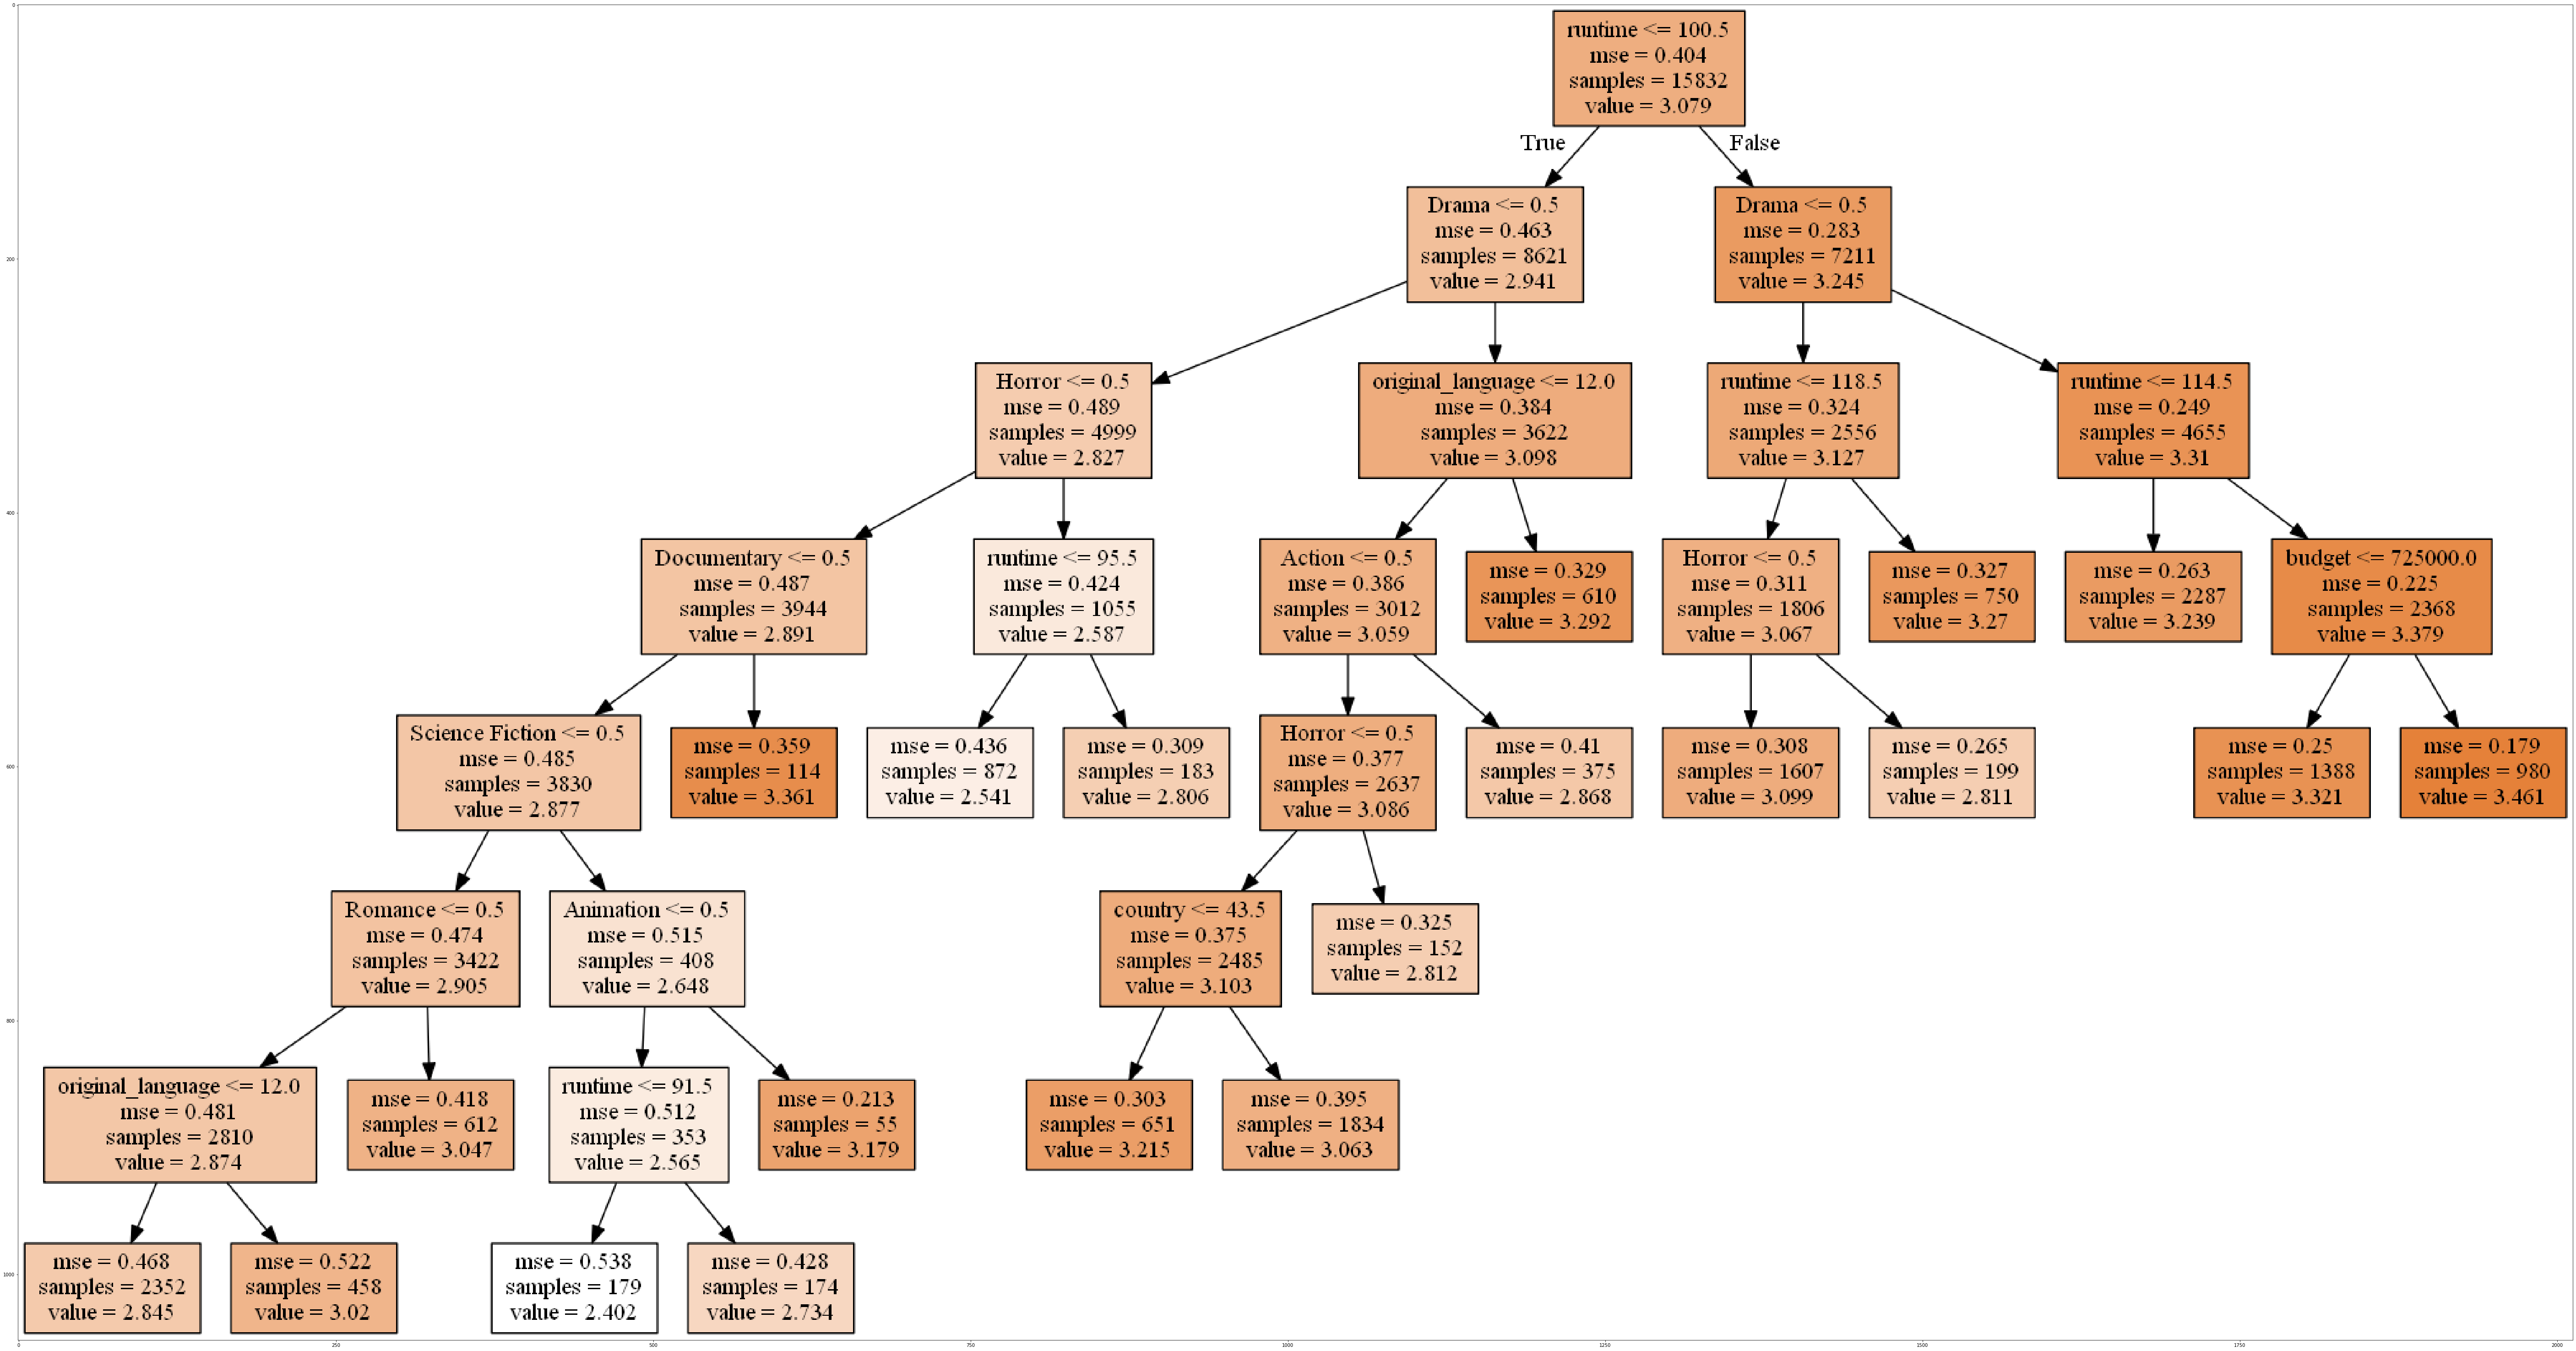

In [135]:
from IPython.display import Image  
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
import io
import matplotlib.pyplot as plt

import sys
str1 = "/usr/local/Cellar/graphviz/2.40.1_1/bin/"
sys.path.append(str1)

dot_data = io.StringIO()
tree.export_graphviz(rt, out_file=dot_data, filled=True, feature_names = names, class_names = 'Ratings')

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')

plt.figure(figsize=(100, 100))
img = mpimg.imread('dt.png')
imgplot = plt.imshow(img)

plt.show()